In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")#binary classification dataset

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13:]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [20]:
# feature engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [22]:
# concatinate both columns to the dataset
X = X.drop(['Geography','Gender'],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [29]:
X = pd.concat([X,geography,gender],axis=1)

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  bool   
 9   Spain            10000 non-null  bool   
 10  Male             10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB


In [38]:
# Splitting the dataset into training and testing datset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 21.3 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 22.5 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [40]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [41]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [42]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [44]:
## Part 2 now we create ANN
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.9 MB ? eta -:--:

In [45]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout

In [80]:
## Initailize the  ANN
classifier = Sequential()

In [81]:
## Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [82]:
## Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [83]:
## adding seconde hidden layers
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [84]:
## adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [87]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [85]:
## Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [88]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7826 - loss: 0.5024 - val_accuracy: 0.8175 - val_loss: 0.4178
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8183 - loss: 0.4175 - val_accuracy: 0.8326 - val_loss: 0.3846
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8366 - loss: 0.3870 - val_accuracy: 0.8466 - val_loss: 0.3702
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8459 - loss: 0.3699 - val_accuracy: 0.8444 - val_loss: 0.3749
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8452 - loss: 0.3737 - val_accuracy: 0.8421 - val_loss: 0.3799
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8535 - loss: 0.3730 - val_accuracy: 0.8455 - val_loss: 0.3787
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8304 - loss: 0.3877 - val_accuracy: 0.8425 - val_loss: 0.3750
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.3741 - 

In [89]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

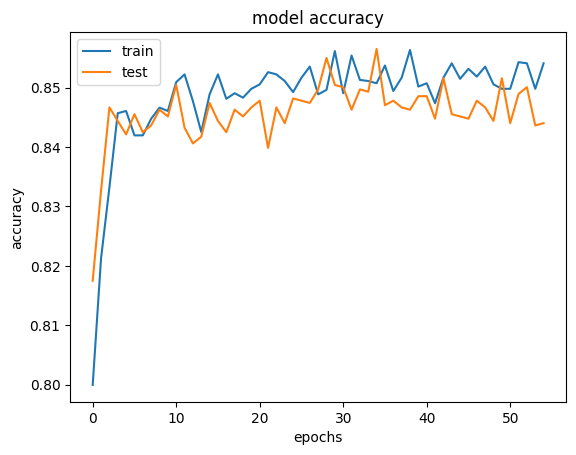

In [90]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("model accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()

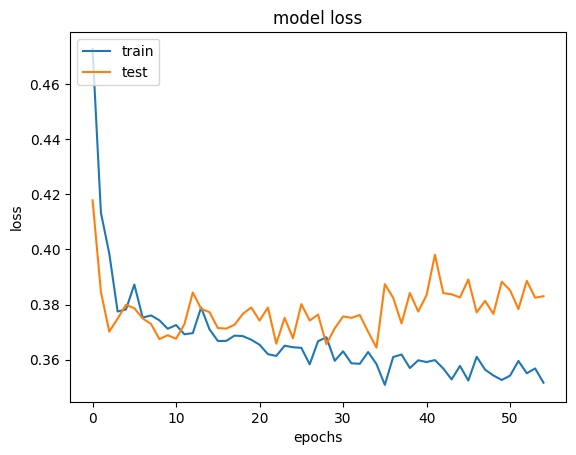

In [91]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [92]:
## Part 3 : Making the prediction and valuating the model

# prediction the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [93]:
# make the confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [94]:
cm

array([[1567,   28],
       [ 257,  148]])

In [95]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8575

In [96]:
## get the weights
classifier.get_weights()

[array([[-4.01941538e-01, -3.16190839e-01, -6.53283119e-01,
          1.21843839e+00,  3.18900347e-01,  2.56024766e+00,
          1.30038798e+00, -3.64890724e-01,  1.74664818e-02,
         -3.10354352e-01, -9.80072320e-02],
        [-1.63616538e-01,  1.66096485e+00, -2.41391897e+00,
         -4.01341438e+00, -1.57846653e+00, -2.35748339e+00,
         -1.52916300e+00, -4.71267128e+00, -2.87698126e+00,
          2.34904599e+00, -1.36471123e-01],
        [ 3.13354552e-01,  5.38737401e-02,  4.25226510e-01,
          1.01028517e-01,  1.23449504e+00,  1.04181031e-02,
          1.84235120e+00, -1.93441480e-01,  7.91296661e-01,
          4.04491276e-02,  7.07122386e-01],
        [-3.66618419e+00, -1.97890544e+00,  6.78574264e-01,
          1.25624156e+00, -2.92962646e+00, -4.91251051e-01,
          1.81022131e+00, -9.11484301e-01, -5.75452387e-01,
          7.26878464e-01,  7.60865331e-01],
        [-4.13690519e+00,  2.86951303e-01,  1.47792861e-01,
         -3.18528563e-01,  2.98555102e-02,  